In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [27]:
data =pd.read_csv('bank-additional-full.csv',sep=';')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

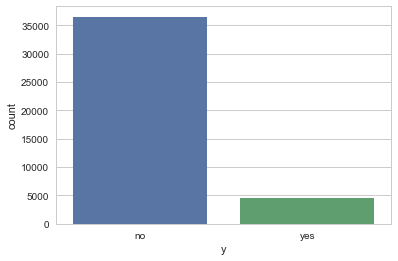

In [28]:
# In[11]:

data.columns


# In[12]:

data.info()


# In[13]:

data.shape


# In[14]:

data.shape


# In[15]:

#data['nr.employed'].unique()


# In[16]:

Null_values_data=data.isnull().sum()/len(data)*100


# In[17]:

dtype_attribute=data.columns.to_series().groupby(data.dtypes).groups
#dtype_attribute


# In[18]:

x = data.columns.to_series().groupby(data.dtypes).groups
x


# In[19]:

categorical_list =[x for x in data.columns if data[x].dtype==object]
#categorical_list    


# In[20]:

unique_values_dict ={}
for i in categorical_list:
    li=[]
    unique_values_dict[i]=data[i].unique()
    


# In[21]:

unique_values_dict


# In[22]:

key_list = data['y'].value_counts().index.tolist()


# In[23]:

value_list=data['y'].value_counts().tolist()


# In[24]:

dict_response = dict(zip(key_list,value_list))


# In[25]:

dict_response_percentage={}
dict_response_percentage['no'] = dict_response['no']/(dict_response['no']+dict_response['yes'])
dict_response_percentage['yes'] = dict_response['yes']/(dict_response['no']+dict_response['yes'])


# In[26]:

dict_response_percentage


# In[27]:

sns.set_style('whitegrid')


# In[28]:

sns.countplot(data=data,x='y')
#Shows Class imbalance problem

In [29]:
dict_y ={"y":{'yes':1,'no':0}}
data.replace(dict_y,inplace = True)
data=pd.get_dummies(data=data,columns=['job','education','default','housing','loan','contact',
'month','day_of_week','poutcome','marital'])

In [30]:
data.shape

(41188, 64)

In [31]:
X = data.drop('y', axis = 1)
y = data['y']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                        test_size=0.3,random_state=10,stratify = y)
clf = LogisticRegression(C=.01,max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
C = confusion_matrix(y_test,clf.predict(X_test))

In [50]:
#data

In [51]:
tpr = C[1,1]/(C[1,0]+C[1,1])
tnr = C[0,0]/(C[0,1]+C[0,0])
print("TNR {:.3f}".format(tnr))
print("TPR {:.3f}".format(tpr))

TNR 0.974
TPR 0.392


In [52]:
data.shape

(41188, 64)

In [53]:
df_0=data[data['y']==0]
df_1=data[data['y']==1]



In [54]:
chunkSize = 4640
numberChunks = len(df_0)//chunkSize
print(numberChunks)

7


In [58]:
from sklearn.metrics import roc_auc_score

In [101]:
li = []
li_roc =[]
for i in range(numberChunks):
    df_split = df_0[i*chunkSize:(i+1)*chunkSize]
    frames = [df_split,df_1]
    final_df = pd.concat(frames)
    final_df = final_df.sample(frac=1)
    X_underSample = final_df.drop('y', axis = 1)
    y_underSample = final_df['y']
    X_train, X_test, y_train, y_test = train_test_split(X_underSample, y_underSample, 
                    test_size=0.3,random_state=10)
    clf = LogisticRegression(C=100,max_iter=1000)
    clf.fit(X_train, y_train)
    C = confusion_matrix(y_test,clf.predict(X_test))
    tpr = C[1,1]/(C[1,0]+C[1,1])
    tnr = C[0,0]/(C[0,1]+C[0,0])
    print("TNR {:.3f}".format(tnr))
    print("TPR {:.3f}".format(tpr))
    li.append((tpr,tnr))
    #for i in range(2):
        #fpr[i], tpr[i], _ = roc_curve(y_test, clf.predict(X_test))
        #roc_auc[i] = auc(fpr[i], tpr[i])

    print("ROC Score ",roc_auc_score(y_test, clf.predict(X_test)))
    li_roc.append(roc_auc_score(y_test, clf.predict(X_test)))
    #plt.figure()
    #plt.plot(fpr[1], tpr[1])
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title('Receiver operating characteristic')
    #plt.show()
    #print(C)
    #show_confusion_matrix(C, ['Class 0', 'Class 1'])
    #pred = clf.predict(X_test)
    #print(classification_report(y_test,pred))
    print("*******************")
    

TNR 0.992
TPR 0.960
ROC Score  0.975945507552
*******************
TNR 0.977
TPR 0.954
ROC Score  0.965042519412
*******************
TNR 0.974
TPR 0.946
ROC Score  0.960039840308
*******************
TNR 0.974
TPR 0.941
ROC Score  0.957626790624
*******************
TNR 0.988
TPR 0.961
ROC Score  0.974586637063
*******************
TNR 0.974
TPR 0.899
ROC Score  0.936153334806
*******************
TNR 0.965
TPR 0.900
ROC Score  0.932728202677
*******************


In [110]:
li

[(0.95979899497487442, 0.99209202012940334),
 (0.95355587808417996, 0.9765291607396871),
 (0.94584569732937684, 0.97423398328690802),
 (0.94113424264178036, 0.97411933860531996),
 (0.96074232690935046, 0.98843094721619662),
 (0.89869753979739508, 0.97360912981455061),
 (0.90021382751247325, 0.9652425778421434)]

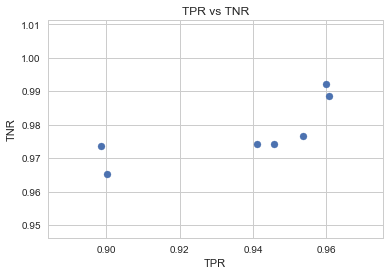

In [102]:
plt.scatter(*zip(*li))
plt.xlabel("TPR")
plt.ylabel("TNR")
plt.title('TPR vs TNR')
plt.show()

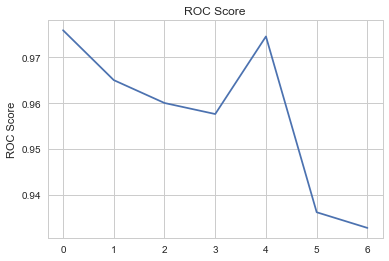

In [109]:
plt.plot(li_roc)
plt.ylabel("ROC Score")
plt.title("ROC Score")

In [85]:
X.shape

(41188, 63)

In [86]:
y.shape

(41188,)

In [88]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


In [89]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)

In [90]:
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 36548, 1: 36548})


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3,random_state=10)
clf = LogisticRegression(C=.01,max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
C = confusion_matrix(y_test,clf.predict(X_test))
tpr = C[1,1]/(C[1,0]+C[1,1])
tnr = C[0,0]/(C[0,1]+C[0,0])
print("TNR {:.3f}".format(tnr))
print("TPR {:.3f}".format(tpr))

TNR 0.856
TPR 0.890


In [93]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res_ros, y_res_ros = ros.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res_ros)))

Resampled dataset shape Counter({0: 36548, 1: 36548})


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_res_ros, y_res_ros, 
                                        test_size=0.3,random_state=10)
clf = LogisticRegression(C=.01,max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
C = confusion_matrix(y_test,clf.predict(X_test))
tpr = C[1,1]/(C[1,0]+C[1,1])
tnr = C[0,0]/(C[0,1]+C[0,0])
print("TNR {:.3f}".format(tnr))
print("TPR {:.3f}".format(tpr))

TNR 0.855
TPR 0.893


In [96]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X_res_ada, y_res_ada = ada.fit_sample(X, y)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_res_ada, y_res_ada, 
                                        test_size=0.3,random_state=10)
clf = LogisticRegression(C=.01,max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
C = confusion_matrix(y_test,clf.predict(X_test))
tpr = C[1,1]/(C[1,0]+C[1,1])
tnr = C[0,0]/(C[0,1]+C[0,0])
print("TNR {:.3f}".format(tnr))
print("TPR {:.3f}".format(tpr))

TNR 0.730
TPR 0.835
